<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-1.6093, -1.3357, -0.772 , -0.6552, -1.1581],
       [ 0.    ,  0.196 ,  0.3802, -0.0041, -0.0149],
       [ 0.    ,  0.    ,  0.4791,  0.0325,  0.5845],
       [ 0.    ,  0.    ,  0.    ,  0.846 ,  0.1214],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.33  ]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [7]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)

    for i,column in enumerate(A.T):
        Q[:,i] = column
        for prev in Q.T[:i]:
            Q[:,i] -= (prev @ column)/(prev @ prev) * prev
    Q/=np.linalg.norm(Q,axis = 0)
    R = Q.T @ A
    return Q, R

In [8]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [9]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [10]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [11]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]

        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    ##Your Code ends here
    return Q, R

In [12]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [13]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [15]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [16]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

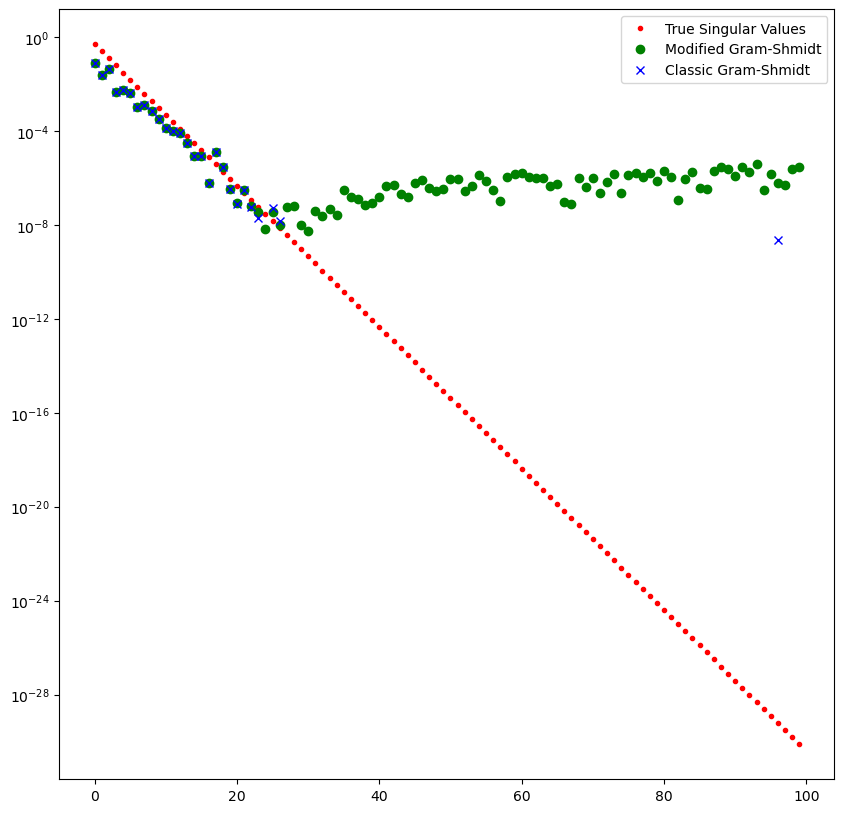

In [17]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [18]:
##Your Code start here
def qr_method(A,num):

    n = A.shape[0]
    Q, R = mgs(A)

    for i in range(num):

        B = R @ Q
        Q, R = mgs(B)

    return np.sort(np.diag(B))
##Your Code ends here

In [19]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print("\n --- calculated by QR method ---")
for i in [1,5,10,20,100]:
    print(qr_method(A,i))
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- calculated by QR method ---
[0. 2. 2. 3.]
[-0.247   1.4541  2.7929  3.    ]
[-0.247   1.4451  2.8019  3.    ]
[-0.247   1.445   2.8019  3.    ]
[-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.




my description : Peak Signal-to-Noise Ratio (PSNR) is a measure used to evaluate the quality of an image or video by comparing the original signal with the compressed or distorted signal. It is often used in image and video compression to assess the level of distortion introduced by the compression process.

The formula for calculating PSNR is:

PSNR = 10 * log10((R^2) / MSE)

Where:

R is the maximum possible pixel value of the image (e.g. 255 for 8-bit grayscale images)
MSE is the Mean Squared Error between the original and distorted images
To draw the PSNR diagram in terms of different r, we can vary the value of r and calculate the corresponding PSNR for each value. We can then plot the PSNR values against the different values of r to visualize the relationship between the two.

Let's assume we have a set of values for r ranging from 1 to 10. We can calculate the PSNR for each value of r using the formula above and plot the results on a graph.

The resulting diagram will show how the PSNR changes as the value of r varies, providing insight into how different levels of compression affect the quality of the image. This can be useful for determining the optimal value of r for a given compression algorithm, as well as for comparing the performance of different compression methods.

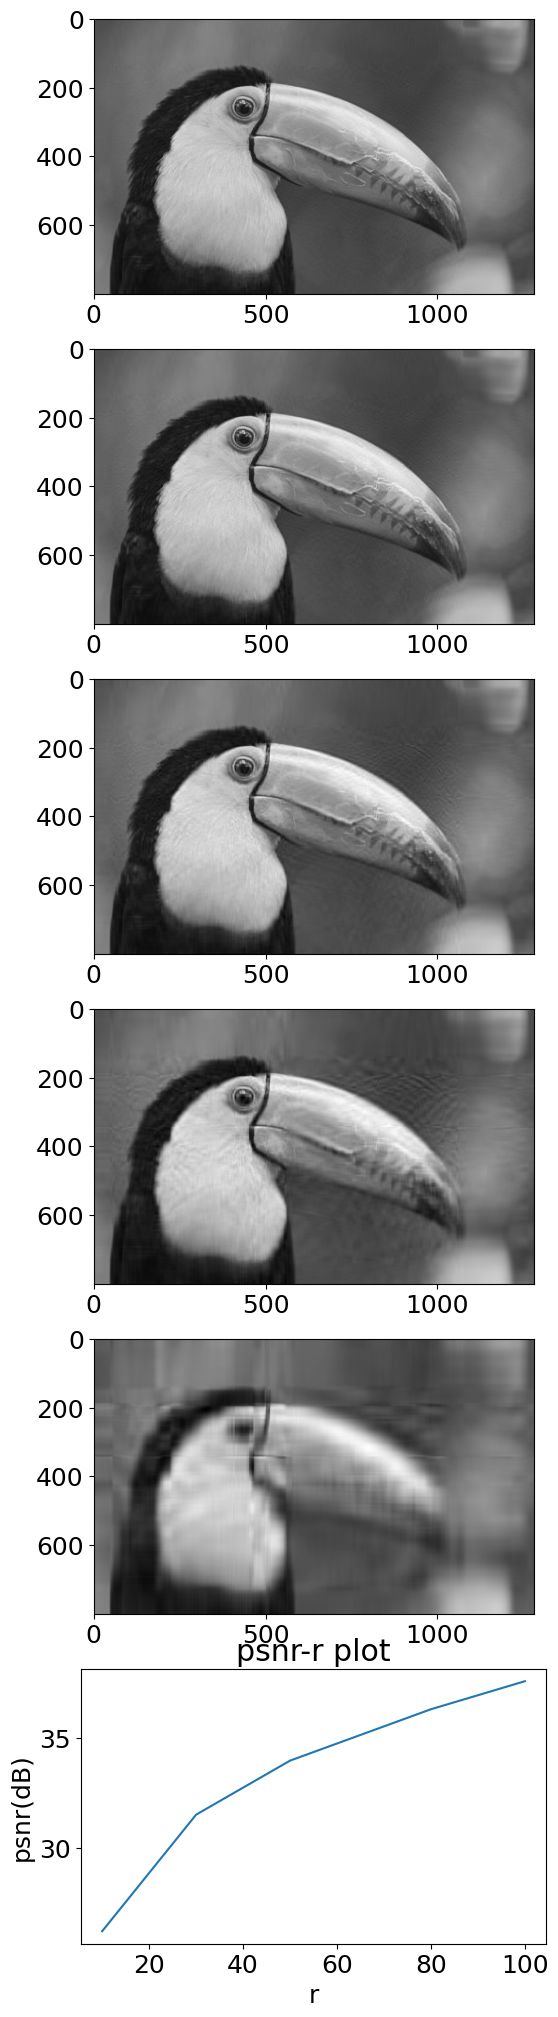

In [20]:
##Your Code start here
from PIL import Image
from math import log10, sqrt
img = Image.open('pic.jpg').convert('L')
img = np.array(img)
def compress(r,img):
    U , S , Vt = np.linalg.svd(img)
    U_r = U[:, :r]
    S_r = np.diag(S[:r])
    Vt_r = Vt[:r, :]
    compressed = U_r @ S_r @ Vt_r
    return compressed
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if mse == 0:
        return 1000
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr
r=[100 ,80, 50, 30, 10]
psnr=[]
plt.figure(figsize=(6,25))
for i in r:
    c = compress(i,img)
    psnr.append(PSNR(img,c))
    plt.subplot(6,1,r.index(i)+1)
    plt.imshow(c,cmap = 'gray')
plt.subplot(6,1,6)    
plt.title("psnr-r plot")
plt.xlabel("r")
plt.ylabel("psnr(dB)")
plt.plot(r,psnr)
plt.show()
##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


56.23977175370083 55.1222823503523


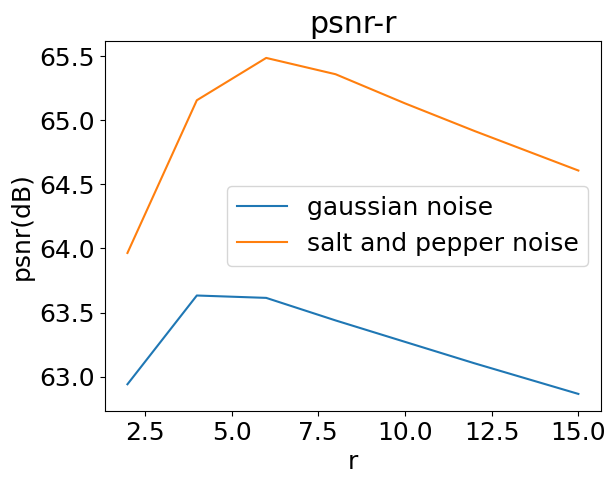

In [21]:
##Your Code start here
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 1
    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean=0, std=1):
    row, col = image.shape
    gauss = np.random.normal(mean, std, (row, col))
    noisy_image = np.clip(image + gauss, 0, 1)
    return noisy_image
img1 = img/255
snp_noise = add_salt_and_pepper_noise(img1,salt_prob=0.4,pepper_prob=0.4)
g_noise = add_gaussian_noise(img1)
psnr_snp = PSNR(img1,snp_noise)
psnr_g = PSNR(img1,g_noise)
print(psnr_snp,psnr_g)
r=[2,4,6,8,10,12,15]
psnr_g=[]
psnr_snp=[]

for i in r:
    c = compress(i,snp_noise)
    psnr_snp.append(PSNR(img1,c))
    c = compress(i,g_noise)
    psnr_g.append(PSNR(img1,c))

plt.figure()
plt.title("psnr-r")
plt.xlabel("r")
plt.ylabel("psnr(dB)")
plt.plot(r,psnr_g,label="gaussian noise")
plt.plot(r,psnr_snp,label="salt and pepper noise")
plt.legend()
plt.show()
##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Import Dataset

In [3]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

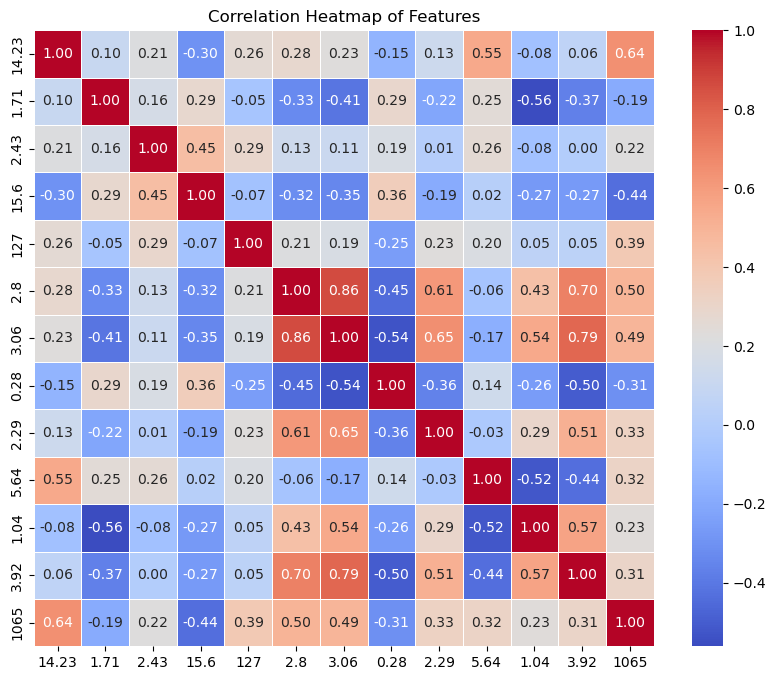

In [4]:
##Your Code start here
correlation = Datapoint.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [5]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

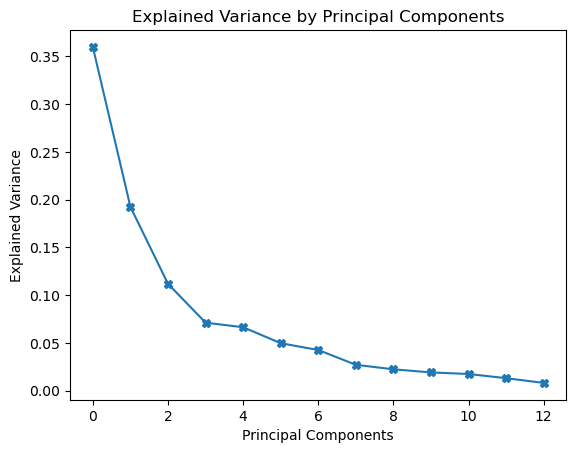

In [6]:
##Your Code start here
scaler = StandardScaler()
data_standardized = scaler.fit_transform(Datapoint)

# Create a PCA instance
pca = PCA()

# Fit the data and transform it to its principal components
principal_components = pca.fit_transform(data_standardized)

# Plot the explained variance by each component
plt.plot(pca.explained_variance_ratio_, marker='X')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [7]:
##Your Code start here
mean = np.mean(Datapoint, axis=0)
std_dev = np.std(Datapoint, axis=0)
Datapoint_scaled = (Datapoint - mean) / std_dev

cov_matrix = np.cov(Datapoint_scaled, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

num_components = 3  # Replace with your guessed number of components
top_eigenvectors = eigenvectors[:, :num_components]
pca_std_datapoint = np.dot(Datapoint_scaled, top_eigenvectors)

print(pca_std_datapoint)
##Your Code ends here

[[-2.23024297  0.30231277  2.03292031]
 [-2.53192196 -1.06225676 -0.97672434]
 [-3.75467731 -2.80530871  0.18037013]
 [-1.0201307  -0.88838036 -2.02386977]
 [-3.04919938 -2.1700067   0.63874711]
 [-2.45822831 -1.20706466  0.9882358 ]
 [-2.06160512 -1.64048497 -0.14376754]
 [-2.51844454 -0.96083709  1.78237967]
 [-2.76797089 -0.82452149  0.98895639]
 [-3.48916135 -1.35519047  0.42931898]
 [-1.76638133 -0.6467145   1.20222501]
 [-2.12870494 -0.71042819  0.88027853]
 [-3.46649467 -1.1821256   1.2273527 ]
 [-4.31363172 -2.15473286  1.27789771]
 [-2.30845048 -1.70092988 -0.20695688]
 [-2.16745547 -2.36700104 -0.82621814]
 [-1.90220844 -1.66778153 -0.78746684]
 [-3.54012997 -2.57341412  0.49894943]
 [-2.09274066 -1.08886084  0.16408621]
 [-3.1319081  -0.82827339  0.35847133]
 [-1.10804505 -0.25248228 -0.9361854 ]
 [-2.55760384  0.06025432  0.31737396]
 [-1.67255267  0.49502043 -0.13642053]
 [-1.78792909  0.29470798 -0.8822433 ]
 [-1.00222687 -0.95757325 -3.81665994]
 [-1.79246479 -0.71100388

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

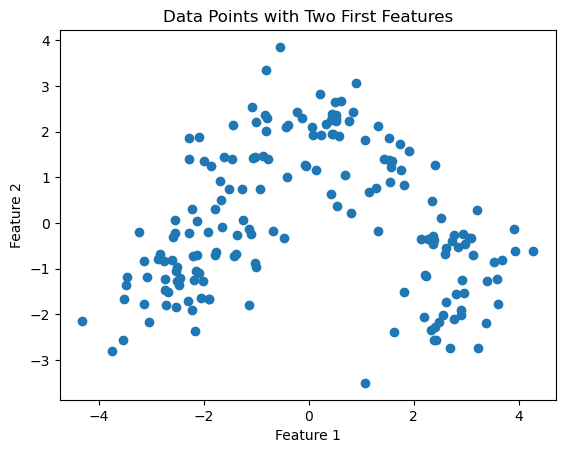

In [8]:
##Your Code start here
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1])
plt.title('Data Points with Two First Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

##Your Code ends here

The number of clusters can be estimated based on this visual inspection. So I think, it can be 2 or 3 clusters.



### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




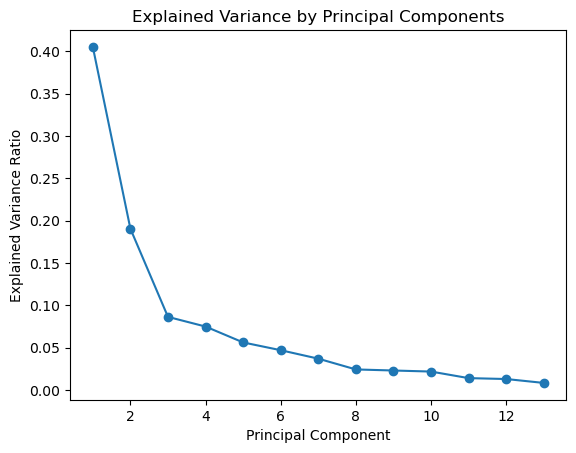

[[-1.08717169  0.65395088 -0.7081056 ]
 [-1.12255362  0.83522689 -1.18521807]
 [-1.41956517  1.22957657 -1.07050538]
 [-0.80405424  0.70183123 -1.28877881]
 [-1.20715552  1.13452169 -0.91383253]
 [-1.14306537  0.94528859 -0.8836425 ]
 [-1.07296179  0.94228098 -0.98576358]
 [-1.10031108  0.95312017 -0.75839956]
 [-1.22824407  0.85293834 -0.8747776 ]
 [-1.32774944  1.00468032 -0.93881162]
 [-0.9760385   0.87023117 -0.70272141]
 [-1.04980722  0.87789159 -0.82115467]
 [-1.22628347  1.00216013 -0.90334171]
 [-1.43444902  1.18723845 -0.87425916]
 [-1.07232333  0.9833009  -0.91633191]
 [-1.02584022  1.09585853 -1.04349672]
 [-0.96709543  0.96065211 -1.04276385]
 [-1.31784875  1.24272926 -0.89298916]
 [-1.05908659  0.82016533 -1.03474354]
 [-1.26143526  0.7731754  -0.97636368]
 [-0.86980058  0.63291989 -1.2568084 ]
 [-1.20111982  0.64452045 -0.98476927]
 [-1.02125545  0.53080322 -0.95086849]
 [-1.05249414  0.54590517 -1.10763954]
 [-0.8173637   0.63275396 -1.46320842]
 [-1.01722872  0.80062185

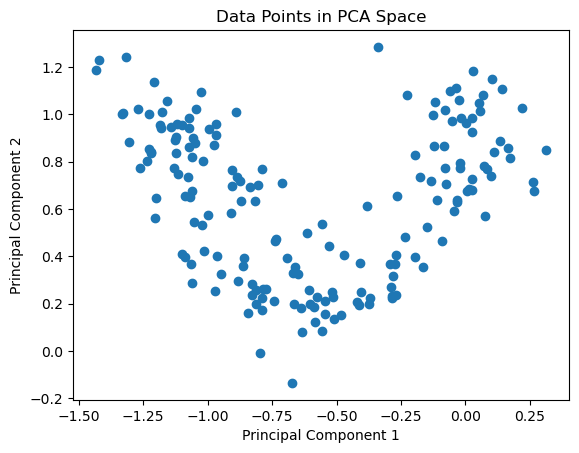

In [9]:
##Your Code start here
Datapoint = pd.read_csv('Datapoint.csv')
scaler = MinMaxScaler()
Datapoint_scaled = scaler.fit_transform(Datapoint)


pca = PCA()
pca.fit(Datapoint_scaled)
principal_components = pca.fit_transform(Datapoint_scaled)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


def pca(X, num_components):
    
    cov_matrix = np.cov(X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
   
    principal_components = sorted_eigenvectors[:, :num_components]
    X_pca = np.dot(X, principal_components)
    
    return X_pca


num_components = 3
pca_MinMax_datapoint = pca(Datapoint_scaled, num_components)
print(pca_MinMax_datapoint)


plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points in PCA Space')
plt.show()
##Your Code ends here

In [ ]:
#as shown in the plots, starting variances are a little different, using MinMax we start from a higher variance but
#reach to almost a same variance zero as the number of principle components increases.

In [ ]:
#answer بالا نوشتم جوابم رو 

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

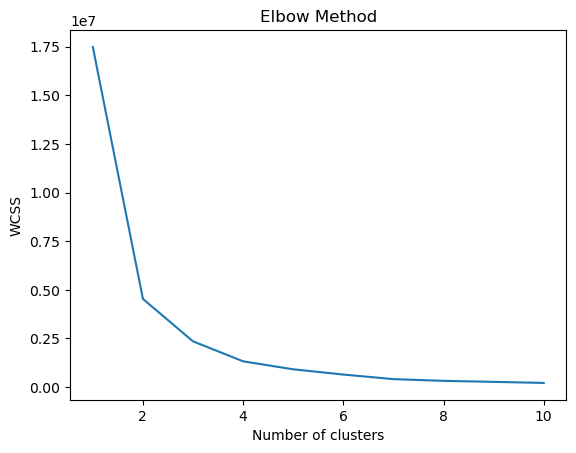

In [10]:
##Your Code start here
Datapoint = pd.read_csv('Datapoint.csv')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Datapoint)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
##Your Code ends here

So the optimal number of clusters is 3.



What is inertia and silhouette metrics?
Explain them briefly.

inertia matrix determines how close datapoints are to the center of their cluster, the smaller the inertia, the better clustering we have. silhouette matrix determines how similar is a datapint to its own cluster compared to other custers, it varies between -1 and 1, higher silhouette shows a better clustering

Inertia:
Inertia, also known as within-cluster sum of squares (WCSS), is a measure of how internally coherent the clusters are. It calculates the sum of squared distances of samples to their closest cluster center.
A lower inertia value indicates that the clusters are more compact and well-separated, which is generally desirable.
However, inertia alone may not be sufficient to determine the optimal number of clusters, as it tends to decrease as the number of clusters increases. This is where the "elbow method" can be used to find an optimal number of clusters based on the rate of decrease in inertia.

Silhouette Score:
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A higher silhouette score suggests that the clusters are well-separated and that the objects within the same cluster are similar to each other.
The silhouette score can be used to evaluate the quality of clustering when the ground truth about the data is not available.
In summary, inertia measures the compactness of clusters, while the silhouette score measures both the compactness and separation of clusters. These metrics are often used to assess the performance of clustering algorithms and to determine the optimal number of clusters for a given dataset.

In [11]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:00<00:05,  1.37it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:01<00:04,  1.32it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

In [12]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:00<00:05,  1.38it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:01<00:04,  1.29it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

Plot the **inertia** and **silhouette ** values

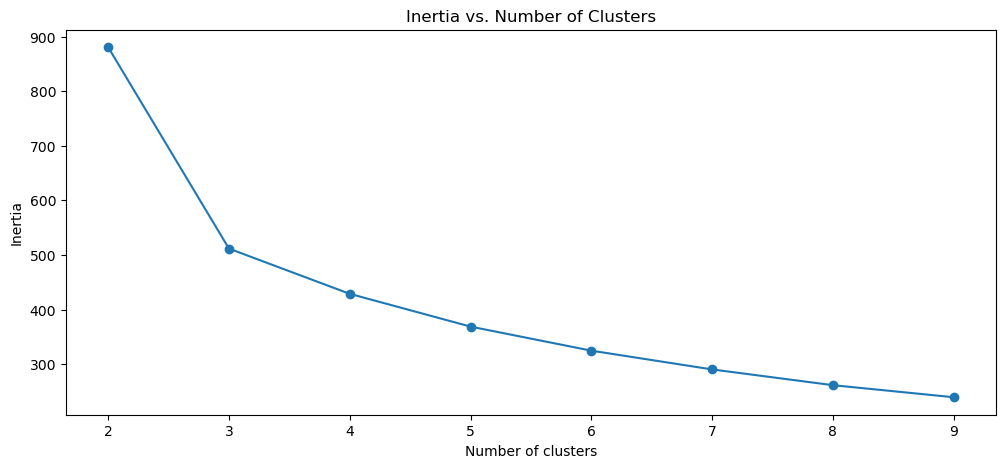

In [13]:
##Your Code start here
plt.figure(figsize=(12, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [14]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

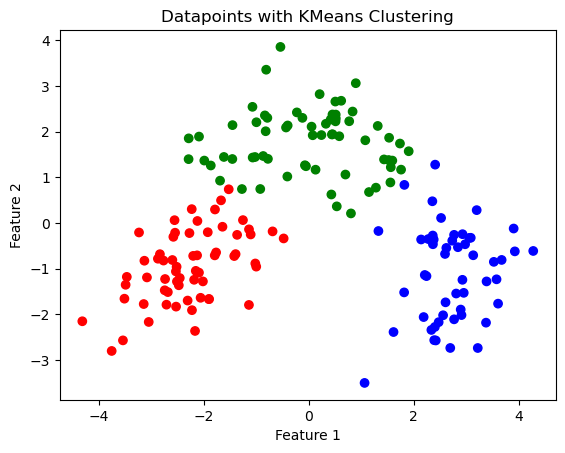

C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


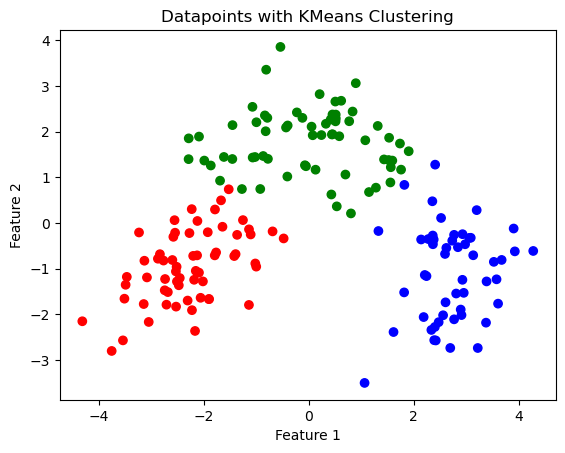

In [16]:
colors = ['red', 'blue','green']

plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

Do all previous steps for MinMax scaled data points.





  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|██████████▌                                                                         | 1/8 [00:00<00:06,  1.05it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|█████████████████████                                                               | 2/8 [00:01<00:05,  1.05it/s]C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmea

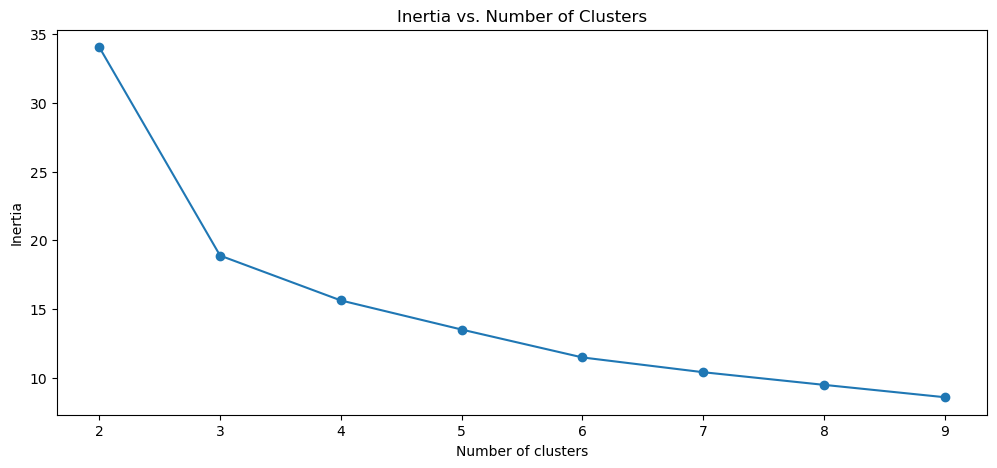

C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


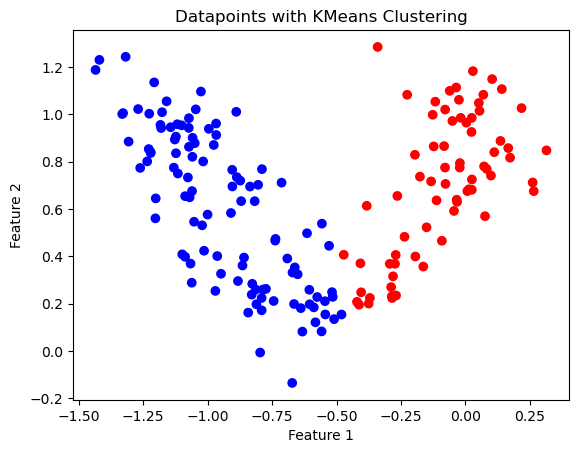

C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Pardis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


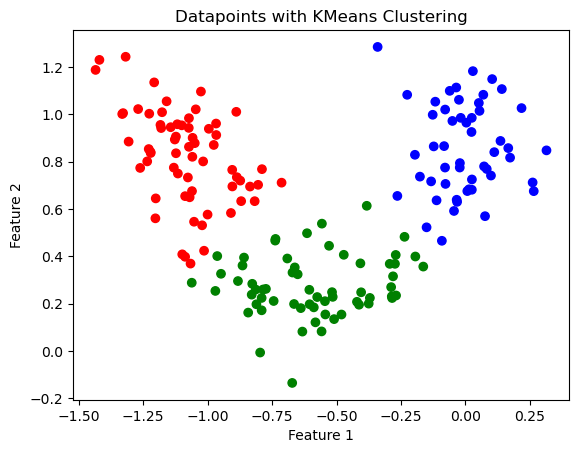

In [17]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_MinMax_datapoint)
    inertia.append(kmeans.inertia_)
    
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_MinMax_datapoint)
    silhouette[i] = sil(pca_MinMax_datapoint, kmeans.labels_, metric='euclidean')
    

plt.figure(figsize=(12, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

plt.show()

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_MinMax_datapoint)

colors = ['red', 'blue','green']

plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_MinMax_datapoint)
plt.scatter(pca_MinMax_datapoint[:, 0], pca_MinMax_datapoint[:, 1], c=[colors[label] for label in y_predict_kmeans1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datapoints with KMeans Clustering')
plt.show()

Compare the results of different scaling methods in a PCA problem

The main difference between MinMax scaling and Standard scaling in a PCA problem lies in the way they normalize the data.
MinMax scaling rescales the data to a specific range, while Standard scaling standardizes the data to have zero mean and unit variance. The choice between these scaling methods depends on the specific requirements of PCA problem and the characteristics of data.